#Import libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#import dataset

In [ ]:
dataset = pd.read_csv('Wine.csv')

In [ ]:
dataset.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


#check for missing values


In [ ]:
dataset.isnull().sum().sort_values(ascending = False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

#filling the missing values by most frequent values

In [ ]:
print(len(dataset.iloc[:, 0].values))

6497


In [ ]:
dataset = dataset.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
dataset.isnull().sum().any()

False

As the above values is False, this means that there's no missing value, so let's move further

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Encoding values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [ ]:
X

array([[1, 7.0, 0.27, ..., 3.0, 0.45, 8.8],
       [1, 6.3, 0.3, ..., 3.3, 0.49, 9.5],
       [1, 8.1, 0.28, ..., 3.26, 0.44, 10.1],
       ...,
       [0, 6.3, 0.51, ..., 3.42, 0.75, 11.0],
       [0, 5.9, 0.645, ..., 3.57, 0.71, 10.2],
       [0, 6.0, 0.31, ..., 3.39, 0.66, 11.0]], dtype=object)

As encoding is done and only numerical values are present, we move further. We can see that values of different are there so we would do Feature Scaling

Let us split the dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-1.75478713  2.50910499 -0.3556337  ... -0.11276355  2.39026185
  -0.91795834]
 [ 0.56986969  1.66697189 -1.0796956  ... -0.4209096  -0.48047001
  -1.17136792]
 [-1.75478713  1.74352945  3.14399881 ...  0.1953825   0.58770929
  -0.4111392 ]
 ...
 [ 0.56986969  0.51860857 -0.05394124 ... -0.4209096  -1.01455965
  -1.42477749]
 [ 0.56986969  1.28418412 -0.47631068 ... -0.54416802 -0.48047001
   0.26461967]
 [ 0.56986969  0.51860857  1.03215161 ... -0.79068486 -0.14666398
  -0.4111392 ]]


In [ ]:
print(X_test)

[[-1.75478713  3.58091076  0.24775122 ...  0.13375329  1.52236617
  -0.07325976]
 [-1.75478713  1.36074167  0.73045915 ...  0.62678697  0.65447049
  -0.83348849]
 [ 0.56986969  0.21237835 -0.83834163 ... -0.17439276 -0.07990277
   0.51802924]
 ...
 [ 0.56986969 -0.09385187 -0.29529521 ... -0.91394328 -1.34836568
   1.44719768]
 [ 0.56986969 -0.5531972  -0.65732616 ...  0.25701171 -0.81427604
  -1.42477749]
 [ 0.56986969 -0.62975476 -0.83834163 ...  0.56515776  0.12038085
   0.85590867]]


In [ ]:
print(len(X[:, 0]))

6497


#Model evaluation


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[  0   1   4   1   0   0   0]
 [  0   1  30  14   2   0   0]
 [  0   0 260 176   2   0   0]
 [  0   0 124 390  42   0   1]
 [  0   0   9 155  51   0   0]
 [  0   0   1  28   8   0   0]
 [  0   0   0   0   0   0   0]]
0.54


KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[  0   2   3   1   0   0]
 [  0   2  25  18   2   0]
 [  0   5 290 138   5   0]
 [  0   6 149 348  52   2]
 [  0   0  20  92 100   3]
 [  0   0   2  14  17   4]]
0.5723076923076923


SVM Linear

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[  0   0   4   2   0   0]
 [  0   0  31  16   0   0]
 [  0   0 266 172   0   0]
 [  0   0 123 434   0   0]
 [  0   0  10 205   0   0]
 [  0   0   0  37   0   0]]
0.5384615384615384


Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[  0   0   5   1   0   0]
 [  0   1  32  13   1   0]
 [  0   1 275 162   0   0]
 [  0   0 114 425  18   0]
 [  0   0   4 167  44   0]
 [  0   0   0  28   9   0]]
0.573076923076923


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[  2   0   3   1   0   0   0]
 [  1   7  15  15   6   0   3]
 [  3   7 230 162   5   0  31]
 [  1  10 140 196  62   1 147]
 [  1   1  11  64  24   3 111]
 [  0   0   2   9   5   2  19]
 [  0   0   0   0   0   0   0]]
0.3546153846153846


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 25, min_samples_split = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[  0   1   4   1   0   0]
 [  2  10  19  12   3   1]
 [  1  13 305 101  16   2]
 [  6  12 134 328  64  13]
 [  1   2  17  69 115  11]
 [  0   1   0   7  11  18]]
0.5969230769230769


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0   0   5   1   0   0]
 [  0   5  30  12   0   0]
 [  0   2 326 106   3   1]
 [  0   3 123 379  51   1]
 [  0   1  11  87 112   4]
 [  0   0   0  12  10  15]]


0.6438461538461538

Let us visualize the data first

In [ ]:
dataset.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


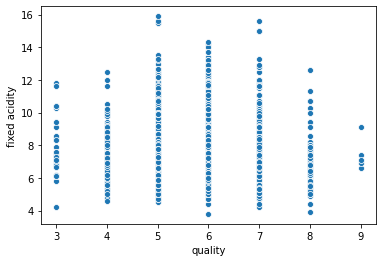

In [ ]:
sns.scatterplot(x = 'quality', y = 'fixed acidity', data= dataset)

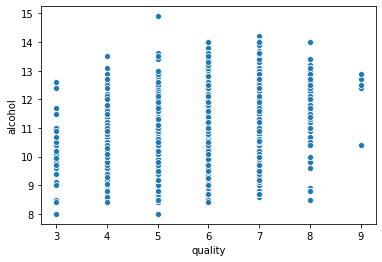

In [ ]:
sns.scatterplot(x = 'quality', y = 'alcohol', data= dataset)

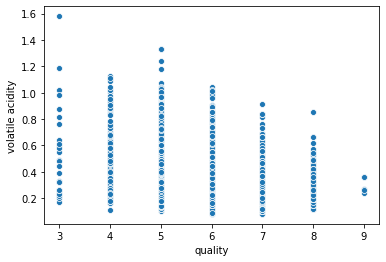

In [ ]:
sns.scatterplot(x = 'quality', y = 'volatile acidity', data= dataset)

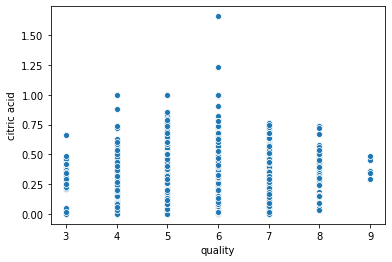

In [ ]:
sns.scatterplot(x = 'quality', y = 'citric acid', data= dataset)

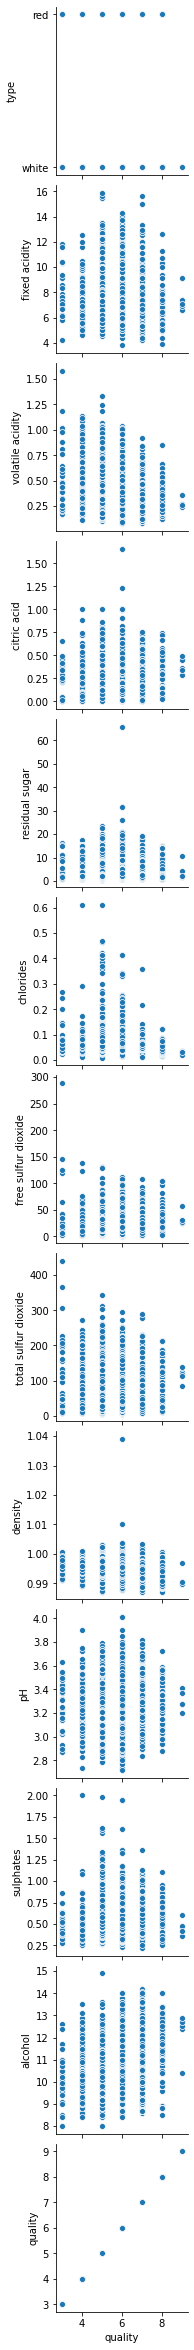

In [ ]:
sns.pairplot(data = dataset, x_vars = ['quality'], y_vars = dataset.columns)

Dividing the  quality into Worst, Good and Best
We will scale between 3-5, 6-7, 8-9

In [ ]:
for i in range(len(y)):
  if(y[i] == 3 or y[i] == 4 or y[i] == 5):
    y[i] = 0
  elif(y[i] == 6 or y[i] == 7):
    y[i] = 1
  else:
    y[i] = 2

In [ ]:
y

array([1, 1, 1, ..., 1, 0, 1])

Let us split the dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-1.75478713  2.50910499 -0.3556337  ... -0.11276355  2.39026185
  -0.91795834]
 [ 0.56986969  1.66697189 -1.0796956  ... -0.4209096  -0.48047001
  -1.17136792]
 [-1.75478713  1.74352945  3.14399881 ...  0.1953825   0.58770929
  -0.4111392 ]
 ...
 [ 0.56986969  0.51860857 -0.05394124 ... -0.4209096  -1.01455965
  -1.42477749]
 [ 0.56986969  1.28418412 -0.47631068 ... -0.54416802 -0.48047001
   0.26461967]
 [ 0.56986969  0.51860857  1.03215161 ... -0.79068486 -0.14666398
  -0.4111392 ]]


In [ ]:
print(X_test)

[[-1.75478713  3.58091076  0.24775122 ...  0.13375329  1.52236617
  -0.07325976]
 [-1.75478713  1.36074167  0.73045915 ...  0.62678697  0.65447049
  -0.83348849]
 [ 0.56986969  0.21237835 -0.83834163 ... -0.17439276 -0.07990277
   0.51802924]
 ...
 [ 0.56986969 -0.09385187 -0.29529521 ... -0.91394328 -1.34836568
   1.44719768]
 [ 0.56986969 -0.5531972  -0.65732616 ...  0.25701171 -0.81427604
  -1.42477749]
 [ 0.56986969 -0.62975476 -0.83834163 ...  0.56515776  0.12038085
   0.85590867]]


In [ ]:
print(len(X[:, 0]))

6497


#Model evaluation


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[284 206   1]
 [117 655   0]
 [  0  37   0]]
0.7223076923076923


KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[314 177   0]
 [137 632   3]
 [  2  31   4]]
0.7307692307692307


SVM Linear

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[276 215   0]
 [109 663   0]
 [  0  37   0]]
0.7223076923076923


Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[305 186   0]
 [109 663   0]
 [  0  37   0]]
0.7446153846153846


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[254 236   1]
 [160 540  72]
 [  3  24  10]]
0.6184615384615385


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 25, min_samples_split = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
as1 = accuracy_score(y_test, y_pred)
print(cm)
print(as1)

[[337 153   1]
 [152 600  20]
 [  3  17  17]]
0.7338461538461538


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train, cv = 10)
score.mean()

[[366 125   0]
 [109 661   2]
 [  0  22  15]]
0.8015384615384615


0.7979627982807174